docs by names (62, 108) 108
names 108 93


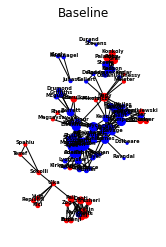

In [39]:
from numpy import genfromtxt
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd
from scipy.optimize import fsolve
from graph import *
from tqdm import tqdm

namesdf = pd.read_csv("names.csv")

plt.subplot(1, 2, 1)
(names, ids, basedata) = getfreqmatrix("baseline/baseline_frequency.csv")
basemat = make_adjacency_matrix(basedata, names)
(baseG, basef) = nx_graph_from_adjacency_matrix(basemat, names, namesdf, 1)
plt.title('Baseline')
nodes = [t[0] for t in baseG.degree]
degs = [t[1] for t in baseG.degree]
n = len(degs)
beta_dict = dict()

def equations(betas):   
    eqs = [None for i in range(n)]
    for i, bi in (enumerate(betas)):
        total = 0
        for j, bj in enumerate(betas):
            if i != j:
                sum = bi + bj
                total += np.exp(sum) / (1+ np.exp(sum))
        total -= degs[i]
        eqs[i] = total
    eq_tuple = tuple(eqs)
    return eq_tuple

def predict(person1, person2):
    if person1 not in beta_dict or person2 not in beta_dict:
        print(person1, person2, "not in dict")
    sum = beta_dict[person1] + beta_dict[person2]
    return (np.exp(sum)/(1+np.exp(sum)))

In [40]:
init = np.random.uniform(size=n)
betas = fsolve(equations, init)
beta_dict = {}
for i in range(n):
    name = nodes[i]
    beta_dict[name] = betas[i]

In [41]:
print(predict("kennan", "koch"))

0.10263970054910615


Text(0, 0.5, 'degree')

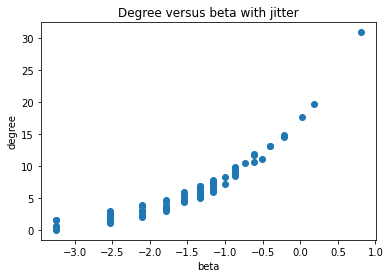

In [52]:
import numpy as np
plt_beta = []
for i,node in enumerate(nodes):
    plt_beta.append(beta_dict[node])
deg_jitter = degs + np.random.uniform(-1,1,len(degs))
plt.scatter(plt_beta, deg_jitter)
plt.title("Degree versus beta with jitter")
plt.xlabel("beta")
plt.ylabel("degree")

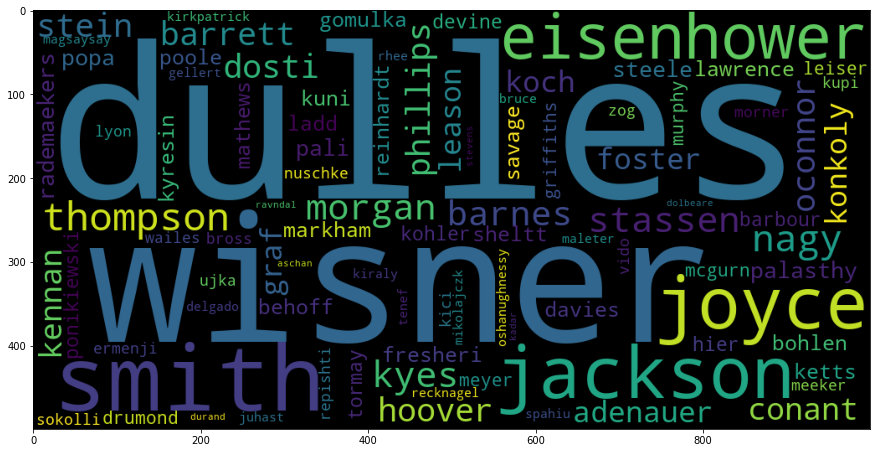

In [54]:
deg_dict = {}
for i,node in enumerate(nodes):
    deg_dict[node] = degs[i]
import matplotlib.pyplot as plt
from wordcloud import WordCloud
wordcloud = WordCloud(width = 1000, height = 500).generate_from_frequencies(deg_dict)

plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
